In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
error ./acute care and ICUs.csv not found
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default
----------------------------------------
Finished loading Cluster module
----------------------------------------


In [29]:
cases = [c for c in clusdata_all]
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [3]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [4]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[68, 68, 68, 68, 68]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[153, 153, 153, 153, 153]
269 269 269 12/31/19 12/31/19 12/31/19


In [5]:
# 61 countries on Sep 24 with mindeaths=200 and mindays=160
# note that changing the minimal common active epidemic time series length mindays from 160 to 150 included only 4 new countries on Sep 24
# decreasing minimal total death count from 200 to 100 included only 3 new countries on Sep 24 
# doing both included 7 new countries : 68 in total 
len(testing_x['dates'])

268

# ClusterFit testing

In [12]:
np.argsort(list(range(4,14)))[-1:][0]

9

16000 2 seats

In [13]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [14]:
[x for x in dir() if 'death' in x]

['deaths',
 'deaths_jhu',
 'deaths_owid',
 'deaths_raw',
 'mindeaths',
 'new_deaths_spm',
 'new_deaths_spm_x',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_x']

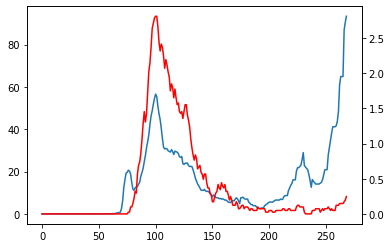

In [22]:
fig,ax = plt.subplots()
ax.plot(new_cases_spm['Denmark'])
axx = ax.twinx()
axx.plot(new_deaths_spm['Denmark'],color='red');


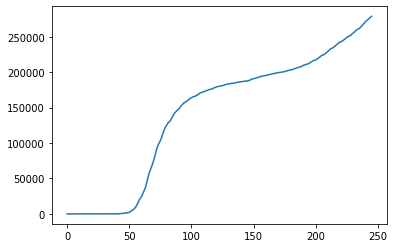

In [9]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [ ]:
len(clusdata_all['cases'])

In [ ]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [ ]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

In [ ]:
foo.clus_labels

In [ ]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

In [ ]:
np.lexsort((c_countries,foo.clus_labels))

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.clus_labels

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [ ]:
len(clusdata_all['cases'])

In [ ]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
np.mean(foofft.clus_probs)

In [ ]:
foofft.clus_labels

In [ ]:
foofft.cluster_plot_all()

In [ ]:
foofft.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [ ]:
len(clusdata_all['deaths'])

In [ ]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

In [ ]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [ ]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [ ]:
foofft.umap_cluster(3) # arg = random seed

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

In [ ]:
plot_all(countries,clusdata_all['deaths'])

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

In [ ]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [ ]:
datasets = [c for c in clusdata_all]
datasets

In [ ]:
len(countries)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [ ]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)

In [ ]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

In [5]:
foo = list(range(10))
foo[3]='red'
foo

[0, 1, 2, 'red', 4, 5, 6, 7, 8, 9]

In [6]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [7]:
foodeath.hdbscan()

cluster validity index = 0.25724090307045433
cluster validity of each cluster:
cluster 1 validity = 0.25724090307045433
cluster 2 validity = [0.29757614 0.30805278 0.31835003]


In [8]:
foodeath.umap(n_neighbors=4)

In [9]:
len(foodeath.clus_labels)

68

In [10]:
foodeath.clus_labels

array([ 1,  2, -1,  2,  1,  2,  0,  1, -1,  0,  2, -1,  2,  0,  2, -1,  0,
        0,  2, -1,  1,  0,  0,  0,  0,  1,  2,  0,  2,  2,  2,  0,  2,  0,
       -1,  2,  0,  2,  0,  1,  1, -1,  2,  0,  0,  2,  1,  2, -1,  0,  0,
        2,  0,  2, -1,  1, -1,  0,  2,  0,  0,  0, -1,  0,  2,  0,  0,  0])

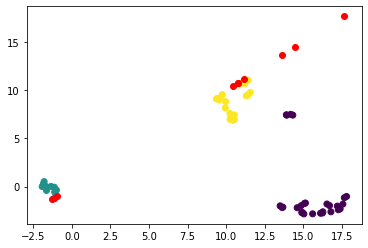

In [11]:
foodeath.plot_umap()

# hdbscan on raw PCA

In [12]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [13]:
foodeath.hdbscan_pca()

shape of cluster data =  (68, 10)
cluster validity index = 0.31682925081959523
cluster validity of each cluster:
cluster 1 validity = 0.31682925081959523
cluster 1 validity = [0.40112183 0.32466969]


In [14]:
foodeath.umap(n_neighbors=4)

In [15]:
len(foodeath.clus_labels)

68

In [16]:
foodeath.clus_labels

array([ 1,  1,  0,  1,  1,  1,  0,  1, -1,  0,  1, -1,  1,  0,  1, -1,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,
        1,  1,  0,  1,  0,  1,  1, -1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        1, -1,  1,  1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0,  0,  0])

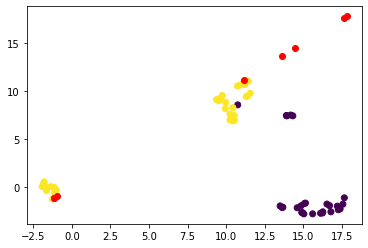

In [17]:
foodeath.plot_umap()

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [18]:
dat = foodeath.dat

In [19]:
foodeath.fitted.shape

(68, 10)

In [20]:
dat.shape

(68, 152)

In [21]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [22]:
len(dat[0])

152

Configure data a samples of a function on a grid, specify the grid as list of days:

In [23]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [24]:
len(dat_disc)

68

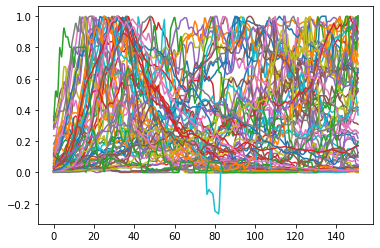

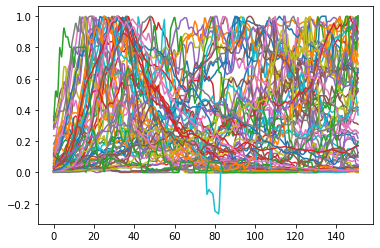

In [25]:
dat_disc.plot()

Text(0.5, 1.0, 'Spain')

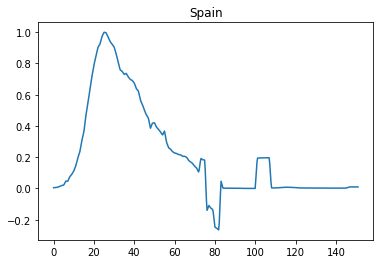

In [26]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

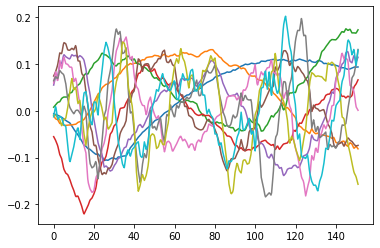

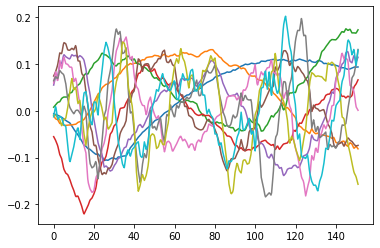

In [27]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


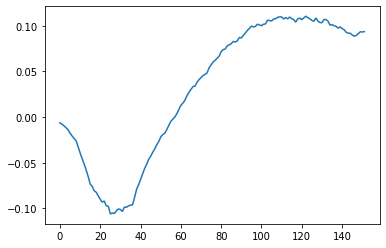

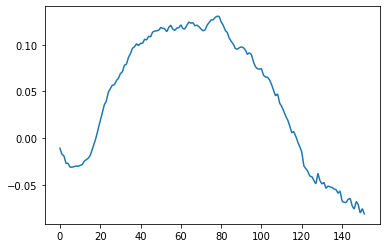

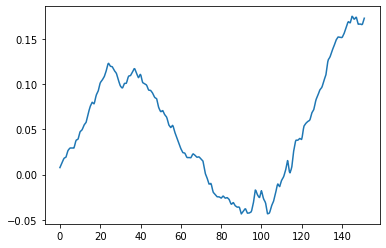

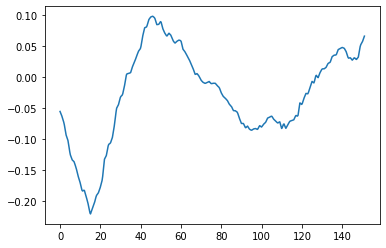

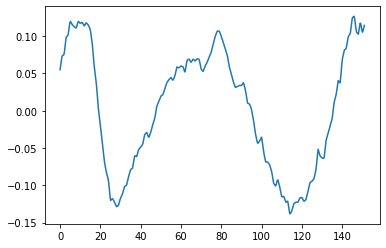

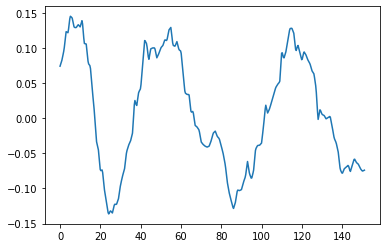

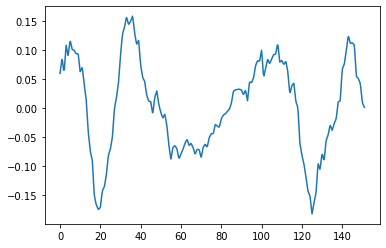

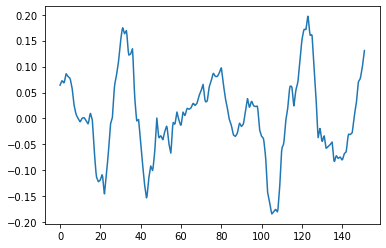

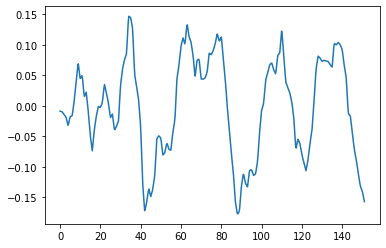

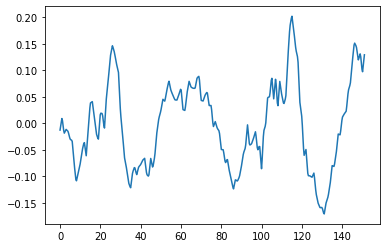

In [28]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [29]:
foo = fpca_disc.transform(dat_disc)

In [30]:
[x for x in dir(fpca_disc) if 'transform' in x]

['_transform_basis', '_transform_grid', 'fit_transform', 'transform']

In [31]:
type(foo)

numpy.ndarray

In [32]:
foo.shape

(68, 10)

In [33]:
foo.shape

(68, 10)

In [34]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   5 FPCAcomponents:   5 clusters;   62 clustered;   6 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   57 clustered;   11 unclustered;  validity = 0.279
hdbscan_min_clus= 2 :   7 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   5 clusters;   63 clustered;   5 unclustered;  validity = 0.279
hdbscan_min_clus= 2 :   9 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.232
hdbscan_min_clus= 2 :   10 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = None
--------------------------
hdbscan_min_clus= 3 :   5 FPCAcomponents:   3 clusters;   54 clustered;   14 unclustered;  validity = 0.369
hdbscan_min_clus= 3 :   6 FPCAcomponents:   3 clusters;   59 clustered;   9 unclustered;  validity = 0.175
hdbscan_min_clus= 3 :   7 FPCAcomponents:   3 clusters;   57 clustered;   11 unclustered;  validity = 0.168
hdbscan_m

In [35]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.243
hdbscan_min_clus= 2 :   4 FPCAcomponents:   3 clusters;   53 clustered;   15 unclustered;  validity = 0.394
hdbscan_min_clus= 2 :   5 FPCAcomponents:   3 clusters;   54 clustered;   14 unclustered;  validity = 0.369
hdbscan_min_clus= 2 :   6 FPCAcomponents:   3 clusters;   59 clustered;   9 unclustered;  validity = 0.175
hdbscan_min_clus= 2 :   7 FPCAcomponents:   3 clusters;   57 clustered;   11 unclustered;  validity = 0.168
hdbscan_min_clus= 2 :   8 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.287
hdbscan_min_clus= 2 :   9 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.288
hdbscan_min_clus= 2 :   10 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.267
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.243
hdbs

In [36]:
labels

array([ 1,  1,  0,  1,  1,  1,  0,  1, -1,  0,  1,  1,  1,  0,  1, -1,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,
        1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        1,  0,  1,  1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0,  0,  0])

### integrated into ClusterFit

In [37]:
foo = ClusterFit(clusdata_all['deaths'])

In [38]:
foo.hdbscan_fpca()

hdbscan_min_clus= 4 :   5 FPCAcomponents:   3 clusters;   37 clustered;   31 unclustered;  validity = 0.294


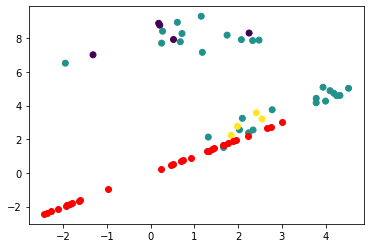

In [39]:
foo.umap()
foo.plot_umap()

### Cases

In [40]:
foocases = ClusterFit(clusdata_all['cases'])
dat = foocases.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [41]:
min_samples = 4
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   6 clusters;   41 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   4 FPCAcomponents:   5 clusters;   37 clustered;   31 unclustered;  validity = 0.242
hdbscan_min_clus= 2 :   5 FPCAcomponents:   5 clusters;   35 clustered;   33 unclustered;  validity = 0.251
hdbscan_min_clus= 2 :   6 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.281
hdbscan_min_clus= 2 :   7 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.265
hdbscan_min_clus= 2 :   8 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   3 clusters;   49 clustered;   19 unclustered;  validity = 0.281
hdbscan_min_clus= 2 :   10 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.266
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.31
hdb

### Cases adj_nonlin

In [43]:
foocases_nonlin = ClusterFit(clusdata_all['cases_nonlin'])
dat = foocases_nonlin.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [44]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,16):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   6 clusters;   49 clustered;   19 unclustered;  validity = None
hdbscan_min_clus= 2 :   4 FPCAcomponents:   8 clusters;   42 clustered;   26 unclustered;  validity = None
hdbscan_min_clus= 2 :   5 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   8 clusters;   44 clustered;   24 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   8 clusters;   42 clustered;   26 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   8 clusters;   46 clustered;   22 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   7 clusters;   42 clustered;   26 unclustered;  validity = 0.27059
hdbscan_min_clus= 2 :   10 FPCAcomponents:   6 clusters;   38 clustered;   30 unclustered;  validity = 0.27622
hdbscan_min_clus= 2 :   11 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = 0.26337
hdbscan_min_clus= 2 :   12

### Scan of optimal clusterings for 6 datasets and 4 clustering quality criteria

The validity calculated by hdbscan does seem to bias lower dimensional embeddings. We study this in a separate notebook "Calibration_of_Validity". Here we consider 4 scorings: the validity, the dimensionality scaled validity, and two combined scorings which also penalizes the number of unclustered points as well as how far the number of clusters departs from 4.

In [30]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for minc in range(3,10):
        min_samples = 2
        for ncomp in range(2,16):  # code will only work if reference value 2 included in range
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   65 clustered;   3 unclustered;  validity = 0.21303 validitysc = 0.2756 score1: 4.228 score2: 2.177
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.14563 validitysc = 0.22396 score1: 5.665 score2: 5.358
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.30613 validitysc = 0.45813 score1: 5.683 score2: 8.185
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   54 clustered;   14 unclustered;  validity = 0.30825 validitysc = 0.48325 score1: 5.869 score2: 8.691
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   56 clustered;   12 unclustered;  validity = 0.2663

hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.30574 validitysc = 0.54361 score1: 3.24 score2: 1.104
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.22603 validitysc = 0.44913 score1: 3.627 score2: 1.336
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23169 validitysc = 0.45708 score1: 3.588 score2: 1.313
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23613 validitysc = 0.46323 score1: 3.559 score2: 1.295
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.24632 validitysc = 0.4771 score1: 3.496 score2: 1.258
--------------------------
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194

hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   7 clusters;   45 clustered;   23 unclustered;  validity = 0.37642 validitysc = 0.50545 score1: 8.078 score2: 15.926
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   50 clustered;   18 unclustered;  validity = 0.24271 validitysc = 0.38049 score1: 7.228 score2: 14.192
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   7 clusters;   43 clustered;   25 unclustered;  validity = 0.29423 validitysc = 0.46664 score1: 8.643 score2: 18.751
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   45 clustered;   23 unclustered;  validity = 0.33459 validitysc = 0.53113 score1: 7.983 score2: 15.156
hdbscan:  3 minc:   2 mins:   8 FPCAcomponents:   7 clusters;   43 clustered;   25 unclustered;  validity = 0.31202 validitysc = 0.51975 score1: 8.424 score2: 16.835
hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   7 clusters;   44 clustered;   24 unclustered;  validity = 0.30587 validitysc = 0.52458 score1: 8.206 score2: 16.013
hdbs

hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.15759 validitysc = 0.34308 score1: 5.515 score2: 6.995
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.15827 validitysc = 0.34424 score1: 5.505 score2: 6.972
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.16376 validitysc = 0.35347 score1: 5.429 score2: 6.79
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.15739 validitysc = 0.34275 score1: 5.518 score2: 7.002
--------------------------
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   59 clustered;   9 unclustered;  validity = 0.15689 validitysc = 0.20731 score1: 6.624 s

hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   53 clustered;   15 unclustered;  validity = 0.41554 validitysc = 0.49981 score1: 7.501 score2: 13.505
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   7 clusters;   48 clustered;   20 unclustered;  validity = 0.37113 validitysc = 0.49981 score1: 7.501 score2: 14.005
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   48 clustered;   20 unclustered;  validity = 0.31343 validitysc = 0.46662 score1: 8.143 score2: 17.145
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   8 clusters;   48 clustered;   20 unclustered;  validity = 0.29909 validitysc = 0.47244 score1: 8.117 score2: 16.933
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   46 clustered;   22 unclustered;  validity = 0.28657 validitysc = 0.47503 score1: 8.005 score2: 16.21
hdbscan:  3 minc:   2 mins:   8 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = 0.25923 validitysc = 0.45507 score1: 7.597 score2: 14.503
hdbsc

hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.19048 validitysc = 0.39646 score1: 6.722 score2: 10.594
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.28889 validitysc = 0.53143 score1: 6.082 score2: 7.903
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.29185 validitysc = 0.53501 score1: 6.069 score2: 7.85
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.19386 validitysc = 0.40168 score1: 6.69 score2: 10.456
--------------------------
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09385 validitysc = 0.09385 score1: 12.655 score2: 21.31
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   16 unclustered;  validity = 0.21847 validitysc = 0.28206 score1

hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   10 unclustered;  validity = 0.47012 validitysc = 0.55495 score1: 6.302 score2: 8.109
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.30828 validitysc = 0.43006 score1: 7.525 score2: 14.649
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = 0.3593 validitysc = 0.51799 score1: 7.331 score2: 12.742
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   43 clustered;   25 unclustered;  validity = 0.34533 validitysc = 0.52539 score1: 7.903 score2: 14.275
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   5 clusters;   47 clustered;   21 unclustered;  validity = 0.30905 validitysc = 0.50189 score1: 6.692 score2: 10.46
hdbscan:  3 minc:   2 mins:   8 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.32933 validitysc = 0.53955 score1: 7.153 score2: 11.12
hdbscan:

hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.30717 validitysc = 0.53637 score1: 7.664 score2: 10.813
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   40 clustered;   28 unclustered;  validity = 0.31114 validitysc = 0.54989 score1: 7.419 score2: 10.184
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.18784 validitysc = 0.39235 score1: 8.349 score2: 14.783
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   40 clustered;   28 unclustered;  validity = 0.18704 validitysc = 0.39109 score1: 8.157 score2: 14.319
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   4 clusters;   40 clustered;   28 unclustered;  validity = 0.18401 validitysc = 0.38633 score1: 8.188 score2: 14.495
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   4 clusters;   40 clustered;   28 unclustered;  validity = 0.18776 validitysc = 0.39223 score1: 8.15 score2: 14.277

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   10 clusters;   59 clustered;   9 unclustered;  validity = 0.57219 validitysc = 0.57219 score1: 6.548 score2: 7.864
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   57 clustered;   11 unclustered;  validity = 0.4182 validitysc = 0.50255 score1: 6.69 score2: 9.85
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   7 clusters;   48 clustered;   20 unclustered;  validity = 0.28158 validitysc = 0.3989 score1: 8.007 score2: 17.548
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   49 clustered;   19 unclustered;  validity = 0.2909 validitysc = 0.44014 score1: 8.072 score2: 17.267
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   8 clusters;   46 clustered;   22 unclustered;  validity = 0.2774 validitysc = 0.44618 score1: 8.641 score2: 19.723
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   49 clustered;   19 unclustered;  validity = 0.28591 validitysc = 0.47423 score1: 7.409 score2: 14.023
hdbscan:  3 

hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.324 validitysc = 0.56453 score1: 5.371 score2: 6.908
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.30318 validitysc = 0.54846 score1: 5.423 score2: 7.111
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.29839 validitysc = 0.54282 score1: 5.442 score2: 7.185
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.24035 validitysc = 0.46901 score1: 6.232 score2: 9.595
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28604 validitysc = 0.52796 score1: 5.294 score2: 6.819
--------------------------
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   10 clusters;   59 clustered;   9 unclustered;  validity = 0.57219 validitysc = 0.57219 score1: 6.548 score2: 7.864
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   57 clustered;   11 unclustered;  validity = 0.4182 validitysc = 0.50255 score1: 6.69 score2: 9.85
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   7 clusters;   48 clustered;   20 unclustered;  validity = 0.28158 validitysc = 0.3989 score1: 8.007 score2: 17.548
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   49 clustered;   19 unclustered;  validity = 0.2909 validitysc = 0.44014 score1: 8.072 score2: 17.267
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   8 clusters;   46 clustered;   22 unclustered;  validity = 0.2774 validitysc = 0.44618 score1: 8.641 score2: 19.723
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   49 clustered;   19 unclustered;  validity = 0.28591 validitysc = 0.47423 score1: 7.409 score2: 14.023
hdbscan:  3 

hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.324 validitysc = 0.56453 score1: 5.371 score2: 6.908
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.30318 validitysc = 0.54846 score1: 5.423 score2: 7.111
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.29839 validitysc = 0.54282 score1: 5.442 score2: 7.185
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.24035 validitysc = 0.46901 score1: 6.232 score2: 9.595
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28604 validitysc = 0.52796 score1: 5.294 score2: 6.819
--------------------------
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4

** move Ncomponents to outside loop**

In [41]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.26

hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   64 clustered;   4 unclustered;  validity = 0.12287 validitysc = 0.25969 score1: 4.651 score2: 3.081
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  9 minc:   2

hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   57 clustered;   11 unclustered;  validity = 0.39208 validitysc = 0.39208 score1: 5.75 score2: 8.417
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
---------------------

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   42 clustered;   26 unclustered;  validity = 0.26839 validitysc = 0.47879 score1: 7.789 score2: 13.576
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   44 clustered;   24 unclustered;  validity = 0.26877 validitysc = 0.48956 score1: 8

-------------------------- cases_lin2020 -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   61 clustered;   7 unclustered;  validity = 0.22325 validitysc = 0.22325 score1: 6.879 score2: 9.406
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   61 clustered;   7 unclustered;  validity = 0.22325 validitysc = 0.22325 score1: 6.879 score2: 9.406
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   57 clustered;   11 unclustered;  validity = 0.17242 validitysc = 0.17242 score1: 8.5 score2: 15.949
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09385 validitysc = 0.09385 score1: 12.655 score2: 21.31
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09385 validitysc = 0.09385 score1: 12.655 score2: 21.31
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validi

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.27149 validitysc = 0.48272 score1: 5.872 score2: 7.872
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.27149 validitysc = 0.48272 score1: 5.872 score2: 7.872
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.27149 validitysc = 0.48272 score1: 5.872 score2: 7.872
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.27009 validitysc = 0.48095 score1: 4.579 score2: 5.198
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.27009 validitysc = 0.48095 score1: 4.579 score2: 5.198
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   45 clustered;   23 unclustered;  validity = 0.26353 validitysc = 0.48286 score1: 8.

hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   9 clusters;   51 clustered;   17 unclustered;  validity = 0.40419 validitysc = 0.40419 score1: 8.374 score2: 18.927
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   7 clusters;   55 clustered;   13 unclustered;  validity = 0.34813 validitysc = 0.34813 score1: 6.972 score2: 13.07
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   8 unclustered;  validity = 0.18914 validitysc = 0.18914 score1: 6.887 score2: 8.459
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   8 unclustered;  validity = 0.18914 validitysc = 0.18914 score1: 6.887 score2: 8.459
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.13199 validitysc = 0.13199 score1: 9.676 score2: 15.153
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.13199 validitysc = 0.13199 score1: 9.676 score2: 15.153
-----------

hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.33647 validitysc = 0.55943 score1: 7.288 score2: 11.172
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.30719 validitysc = 0.52614 score1: 7.701 score2: 11.024
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.30719 validitysc = 0.52614 score1: 7.701 score2: 11.024
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.326 validitysc = 0.54775 score1: 5.826 score2: 8.215
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.326 validitysc = 0.54775 score1: 5.826 score2: 8.215
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.326 validitysc = 0.54775 score1: 5.826 score2: 8.215
-------------

minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2
maxvalid  [(3, 2, 3, 9, 58, 10, 0.47011649871121863, 0.5549500646356426, 6.301963931036856, 8.108837689665854)]
maxvalidsc  [(8, 2, 14, 2, 53, 15, 0.3329915932600972, 0.5822426748309878, 5.717496918772362, 7.72873613447563)]
minscore1 [(5, 2, 3, 7, 58, 10, 0.41752540104541325, 0.501857014343267, 5.492599428561551, 6.974097999965428)]
minscore2 [(5, 2, 3, 7, 58, 10, 0.41752540104541325, 0.501857014343267, 5.492599428561551, 6.974097999965428)]
-------------------------- cases_nonlin -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   10 clusters;   59 clustered;   9 unclustered;  validity = 0.57219 validitysc = 0.57219 score1: 6.548 score2: 7.864
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   6

hdbscan:  8 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22446 validitysc = 0.40852 score1: 6.048 score2: 9.547
hdbscan:  9 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22446 validitysc = 0.40852 score1: 6.048 score2: 9.547
--------------------------
hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = 0.27972 validitysc = 0.49301 score1: 9.028 score2: 20.283
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   39 clustered;   29 unclustered;  validity = 0.28824 validitysc = 0.5035 score1: 8.286 score2: 14.399
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.

hdbscan:  8 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28604 validitysc = 0.52796 score1: 5.294 score2: 6.819
hdbscan:  9 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28604 validitysc = 0.52796 score1: 5.294 score2: 6.819
--------------------------
---------------------------------------------------------
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2
maxvalid  [(3, 2, 2, 10, 59, 9, 0.5721918041140304, 0.5721918041140304, 6.547665717701739, 7.864495729657827)]
maxvalidsc  [(5, 2, 8, 3, 46, 22, 0.3789591044383507, 0.5928532102079087, 6.586758176866932, 9.277169972768124)]
minscore1 [(4, 2, 2, 5, 60, 8, 0.4091499358824234, 0.4091499358824234, 4.544091792030411, 4.888183584060822)]
minscore2 [(4, 2, 2, 5, 60, 8, 0.4091499358824234, 0.4091499358824234, 4.544091792030411, 4.888183584060822)]
-------------------------- cases_nonlinr -----------

hdbscan:  5 minc:   2 mins:   8 FPCAcomponents:   3 clusters;   46 clustered;   22 unclustered;  validity = 0.37896 validitysc = 0.59285 score1: 6.587 score2: 9.277
hdbscan:  6 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22446 validitysc = 0.40852 score1: 6.048 score2: 9.547
hdbscan:  7 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22446 validitysc = 0.40852 score1: 6.048 score2: 9.547
hdbscan:  8 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22446 validitysc = 0.40852 score1: 6.048 score2: 9.547
hdbscan:  9 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22446 validitysc = 0.40852 score1: 6.048 score2: 9.547
--------------------------
hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = 0.27972 validitysc = 0.49301 score1: 9.0

hdbscan:  8 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28604 validitysc = 0.52796 score1: 5.294 score2: 6.819
hdbscan:  9 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28604 validitysc = 0.52796 score1: 5.294 score2: 6.819
--------------------------
---------------------------------------------------------
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2
maxvalid  [(3, 2, 2, 10, 59, 9, 0.5721918041140304, 0.5721918041140304, 6.547665717701739, 7.864495729657827)]
maxvalidsc  [(5, 2, 8, 3, 46, 22, 0.3789591044383507, 0.5928532102079087, 6.586758176866932, 9.277169972768124)]
minscore1 [(4, 2, 2, 5, 60, 8, 0.4091499358824234, 0.4091499358824234, 4.544091792030411, 4.888183584060822)]
minscore2 [(4, 2, 2, 5, 60, 8, 0.4091499358824234, 0.4091499358824234, 4.544091792030411, 4.888183584060822)]


In [50]:

def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info = {}


for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    info[case] = {}
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            info[case]
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                info[case]['minc'] = minc; info[case]['mins']=min_samples; info[case]['ncomp']=ncomp
                info[case]['clustered'] = nclustered; info[case]['unclustered'] = nunclustered
                info[case]['validity']=validity; info[case]['validitysc']=validitysc; info[case]['score1'] = score1; info[case]['score2'] = score2
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.26

hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   64 clustered;   4 unclustered;  validity = 0.12287 validitysc = 0.25969 score1: 4.651 score2: 3.081
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  9 minc:   2

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   9 clusters;   55 clustered;   13 unclustered;  validity = 0.53394 validitysc = 0.53394 score1: 6.973 score2: 10.956
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   57 clustered;   11 unclustered;  validity = 0.39208 validitysc = 0.39208 score1: 5.75 score2: 8.417
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  9 minc: 

hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   42 clustered;   26 unclustered;  validity = 0.26839 validitysc = 0.47879 score1: 7.789 score2: 13.576
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   42 clustered;   26 unclustered;  validity = 0.26839 validitysc = 0.47879 score1: 7.789 score2: 13.576
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
--------

-------------------------- cases_lin2020 -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   61 clustered;   7 unclustered;  validity = 0.22325 validitysc = 0.22325 score1: 6.879 score2: 9.406
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   61 clustered;   7 unclustered;  validity = 0.22325 validitysc = 0.22325 score1: 6.879 score2: 9.406
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   57 clustered;   11 unclustered;  validity = 0.17242 validitysc = 0.17242 score1: 8.5 score2: 15.949
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09385 validitysc = 0.09385 score1: 12.655 score2: 21.31
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09385 validitysc = 0.09385 score1: 12.655 score2: 21.31
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validi

hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   5 clusters;   48 clustered;   20 unclustered;  validity = 0.2588 validitysc = 0.46648 score1: 6.644 score2: 10.719
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.27149 validitysc = 0.48272 score1: 5.872 score2: 7.872
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.27149 validitysc = 0.48272 score1: 5.872 score2: 7.872
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.27149 validitysc = 0.48272 score1: 5.872 score2: 7.872
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.27009 validitysc = 0.48095 score1: 4.579 score2: 5.198
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.27009 validitysc = 0.48095 score1: 4.579 score2: 5.198
----------

hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   7 clusters;   55 clustered;   13 unclustered;  validity = 0.34813 validitysc = 0.34813 score1: 6.972 score2: 13.07
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   8 unclustered;  validity = 0.18914 validitysc = 0.18914 score1: 6.887 score2: 8.459
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   60 clustered;   8 unclustered;  validity = 0.18914 validitysc = 0.18914 score1: 6.887 score2: 8.459
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.13199 validitysc = 0.13199 score1: 9.676 score2: 15.153
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.13199 validitysc = 0.13199 score1: 9.676 score2: 15.153
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   10 unclustered;  validity = 0.47012 validitysc = 0.55495 score1: 6.302

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.30719 validitysc = 0.52614 score1: 7.701 score2: 11.024
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.326 validitysc = 0.54775 score1: 5.826 score2: 8.215
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.326 validitysc = 0.54775 score1: 5.826 score2: 8.215
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.326 validitysc = 0.54775 score1: 5.826 score2: 8.215
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.33632 validitysc = 0.5694 score1: 7.256 score2: 10.976
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.33632 validitysc = 0.5694 score1: 7.256 s

hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
----------------

hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = 0.28004 validitysc = 0.50371 score1: 8.985 score2: 19.853
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   39 clustered;   29 unclustered;  validity = 0.28725 validitysc = 0.51258 score1: 8.251 score2: 14.144
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32199 validitysc = 0.55341 score1

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   10 clusters;   59 clustered;   9 unclustered;  validity = 0.57219 validitysc = 0.57219 score1: 6.548 score2: 7.864
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40915 validitysc = 0.40915 score1: 4.544 score2: 4.888
hdbscan:  9 min

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33172 validitysc = 0.55416 score1: 5.205 score2: 6.496
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = 0.28004 validitysc = 0.50371 score1: 8.985 score2: 19.853
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   39 clustered;   29 unclustered;  validity = 0.28725 validitysc = 0.51258 score1: 

In [51]:
[x for x in info['cases']]

['minc',
 'mins',
 'ncomp',
 'clustered',
 'unclustered',
 'validity',
 'validitysc',
 'score1',
 'score2']

In [49]:
[(x,info[x]['score2']) for x in info]

[('deaths', 1.2575982702949462),
 ('cases', 7.002243153351349),
 ('cases_lin2020', 15.89163133326727),
 ('cases_pwlfit', 15.41165778929095),
 ('cases_nonlin', 6.8187062565319065),
 ('cases_nonlinr', 6.8187062565319065)]

#### Comparison of country assignment probs

In [356]:
clus_argsort = np.lexsort((countries,clusdata[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata)):
    foo = probdata[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [357]:
np.shape(clusdata)
clusdata

array([[-1,  3,  3, ...,  0,  0,  2],
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  1,  1,  1],
       ...,
       [-1,  3,  3, ..., -1,  1, -1],
       [-1,  3,  3, ..., -1,  1, -1],
       [-1,  3,  3, ..., -1,  1, -1]])

In [358]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

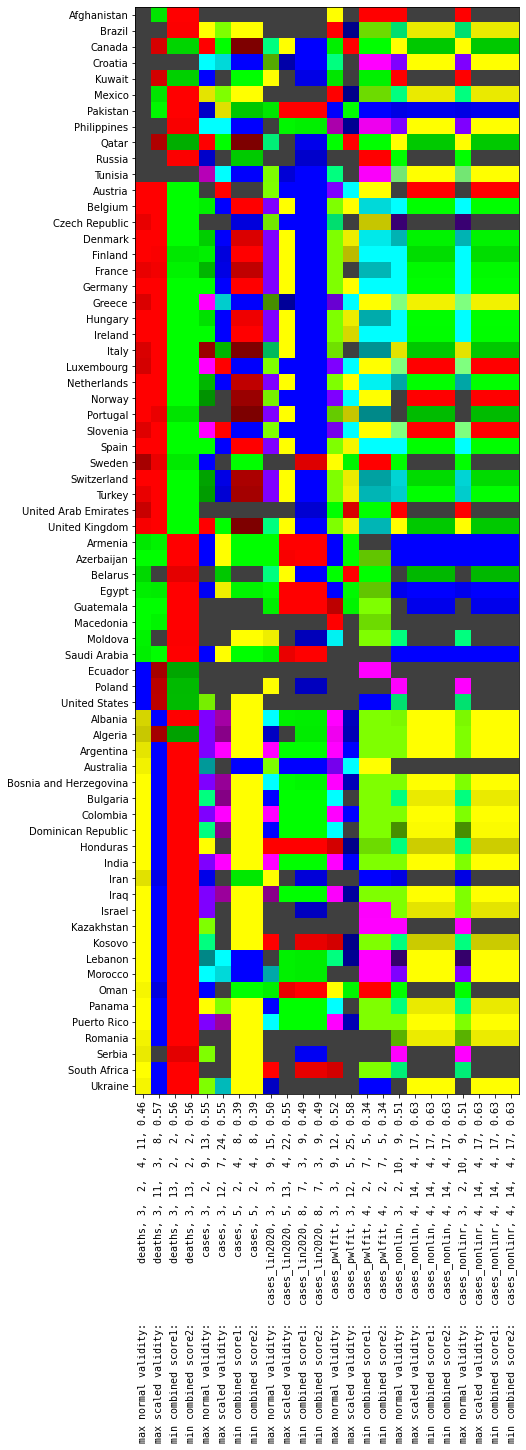

In [359]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

In [367]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = set(clustering_a)
    labels_b = set(clustering_b)
    newcolors_b = np.zeros((len(colors_b),3),dtype=float)
    newcolors_b[:,:] = colors_b[:,:]
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {}
    b_cols = {}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:maxlab})

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:maxlab})
        
    if True:    
        for b in labels_b:   # first adjust colors_b to match mapped clusters from a (transfer and merge)
            amap = [a for a in labels_a if a_to_b[a] == b]
            for a in amap:
                alist = matchset(clustering_a,a)
                a_cols[a] = colors_a[alist[0]]
            blist = matchset(clustering_b,b)
            if len(amap) > 0:
                h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
                for j in blist:
                    s = mpcolors.rgb_to_hsv(colors_b[j])[1] # take s saturation from b
                    v = mpcolors.rgb_to_hsv(colors_b[j])[2] # take v from b
                    newcolors_b[j,:] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb  
            b_cols[b] = newcolors_b[blist[0]] # first matching elt colour (to extract hue)
            
    if False:
        for a in labels_a:   # now readjust colors in b that both map to same a (split)
            bmap = [b for b in labels_b if b_to_a[b] == a]
            if len(bmap)>1:                          
                h = sum([mpcolors.rgb_to_hsv(b_cols[b])[0] for b in bmap])/len(bmap) # average hue from bmap  
                ha = mpcolors.rgb_to_hsv(a_cols[a])[0]
                hb = np.linspace(abs(h-ha/4.),abs(h+ha/4.),len(bmap))
                #print('hb[',hb[0],hb[1],']',h,ha,ha/4.,abs(h-ha/4.),abs(h+ha/4.))
                for i,b in enumerate(bmap):
                    blist = matchset(clustering_b,b)                         
                    for j in blist:                     
                        s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                        v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                        newcolors_b[j,:]= mpcolors.hsv_to_rgb([hb[i],s,v])

    return newcolors_b

In [368]:
print(np.shape(clusdata_s))
print(np.shape(coldata))
coldata_t = np.transpose(coldata,(1,0,2))
print(np.shape(coldata_t))

clusa = clusdata_s[0]
ca = coldata_t[0]
for i in range(1,len(clusdata_s)):
    clusb = clusdata_s[i]
    cb = coldata_t[i]
    newcolors_b = clust(clusa,clusb,ca,cb)
    coldata_t[i,:] = newcolors_b[:]
coldata_adj = np.transpose(coldata_t,(1,0,2))

(24, 68)
(68, 24, 3)
(24, 68, 3)


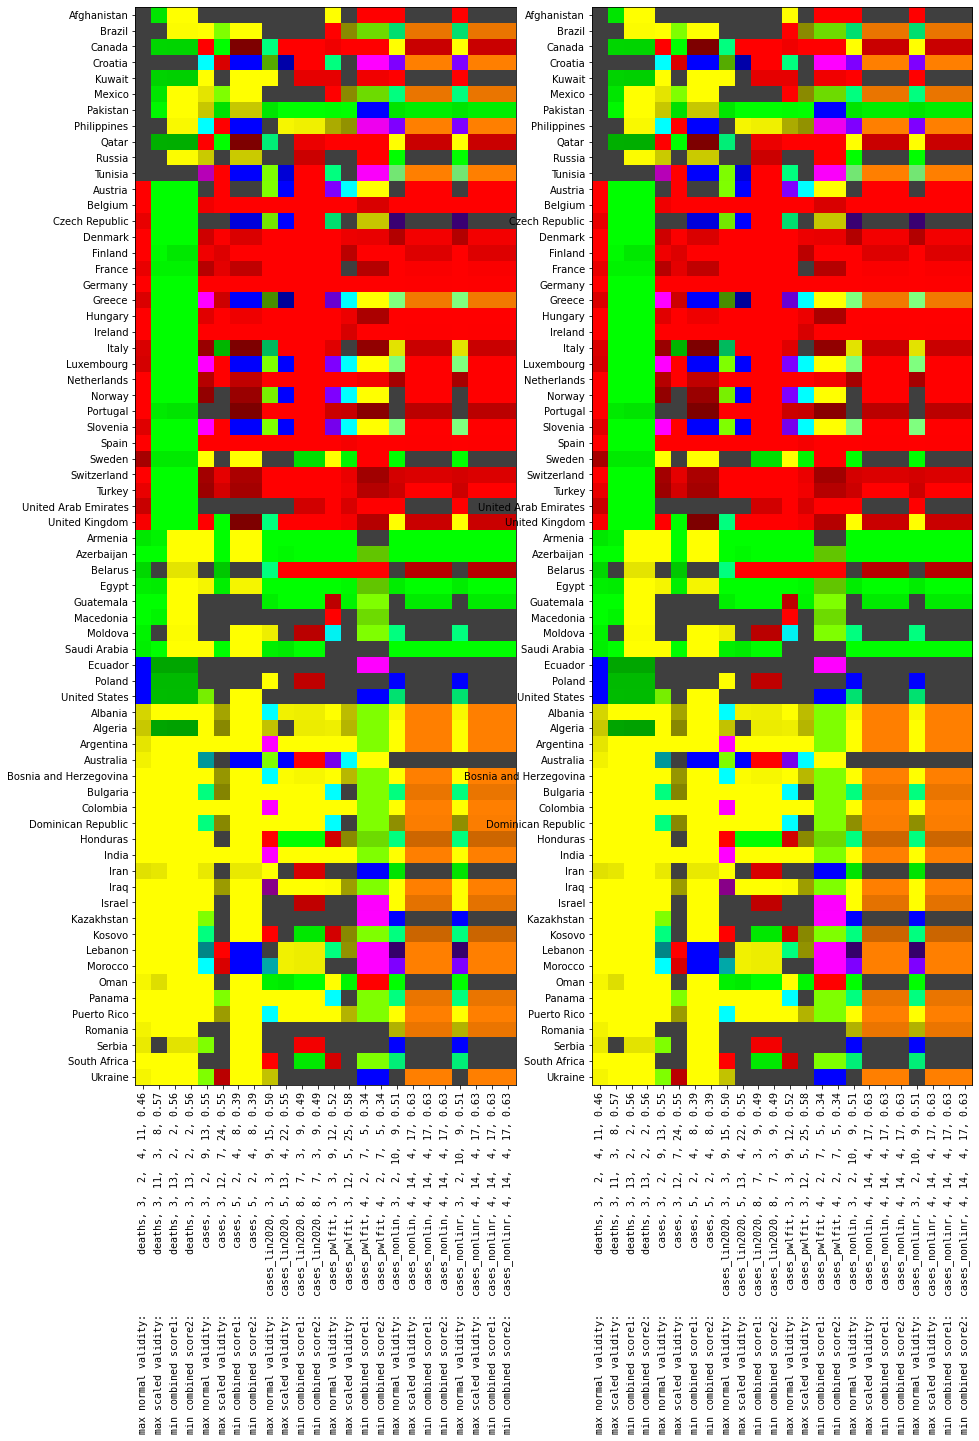

In [369]:
fig,axes = plt.subplots(1,2,figsize=(15,20))

ax = axes[0]
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[1]
img = ax.imshow(coldata_adj)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

plt.show()

### Conclusions

In [37]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report]

score		case	minc	dim	nclus	unclus	validitysc


['max normal validity:          deaths, 4,  2,  3, 16, 0.40',
 'max scaled validity:          deaths, 8, 11,  3,  8, 0.56',
 'min combined score1:          deaths, 3, 11,  4,  5, 0.54',
 'min combined score2:          deaths, 4, 11,  2,  2, 0.54',
 'max normal validity:           cases, 3,  2,  9, 13, 0.53',
 'max scaled validity:           cases, 3, 12,  7, 24, 0.55',
 'min combined score1:           cases, 5,  2,  4,  6, 0.38',
 'min combined score2:           cases, 5,  2,  4,  6, 0.38',
 'max normal validity:   cases_lin2020, 3,  3,  9, 15, 0.50',
 'max scaled validity:   cases_lin2020, 3, 14,  6, 23, 0.58',
 'min combined score1:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score2:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'max normal validity:    cases_pwlfit, 3,  3,  9, 10, 0.55',
 'max scaled validity:    cases_pwlfit, 8, 14,  2, 15, 0.58',
 'min combined score1:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'min combined score2:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'max no

In [38]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'scaled' in x]

score		case	minc	dim	nclus	unclus	validitysc


['max scaled validity:          deaths, 8, 11,  3,  8, 0.56',
 'max scaled validity:           cases, 3, 12,  7, 24, 0.55',
 'max scaled validity:   cases_lin2020, 3, 14,  6, 23, 0.58',
 'max scaled validity:    cases_pwlfit, 8, 14,  2, 15, 0.58',
 'max scaled validity:    cases_nonlin, 5,  8,  3, 22, 0.59',
 'max scaled validity:   cases_nonlinr, 5,  8,  3, 22, 0.59']

In [39]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score1' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score1:          deaths, 3, 11,  4,  5, 0.54',
 'min combined score1:           cases, 5,  2,  4,  6, 0.38',
 'min combined score1:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score1:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'min combined score1:    cases_nonlin, 4,  2,  5,  8, 0.41',
 'min combined score1:   cases_nonlinr, 4,  2,  5,  8, 0.41']

In [40]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score2' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score2:          deaths, 4, 11,  2,  2, 0.54',
 'min combined score2:           cases, 5,  2,  4,  6, 0.38',
 'min combined score2:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score2:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'min combined score2:    cases_nonlin, 4,  2,  5,  8, 0.41',
 'min combined score2:   cases_nonlinr, 4,  2,  5,  8, 0.41']

#### Scan with 4 scorings to compute best cluster, saving results for comparison

In [25]:
data = clusdata_all['deaths']
clusdata = ClusterFit(clusdata_all['deaths'])
dat = clusdata.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [26]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = []
maxvalidval= 0.0
maxvalidsc = []
maxvalidscval= 0.0
minscore1 = []
minscore1val = 999.
minscore2 = []
minscore2val = 999.

print('---------------------------------------------------------')
probdata=np.zeros((7*14,len(dat)),dtype=float)
clusdata = np.zeros((7*14,len(countries)),dtype=np.integer)
report = []
count = 0
for minc in range(3,10):
    min_samples = 2
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        nclus = len(set([x for x in labels if x>-1]))
        nclustered = sum([1 for x in labels if x>-1])
        nunclustered = sum([1 for x in labels if x==-1])
        
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            validity = max(validity,0.001)
            validitysc = rescale(validity,ncomp) 
            score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
            score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
          
            if validity > maxvalidval:
                maxvalidval = validity
                maxvalid = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
            if validitysc > maxvalidscval:
                maxvalidscval = validitysc
                maxvalidsc = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
            if score1 <  minscore1val:
                minscore1val = score1
                minscore1 = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
            if score2 <  minscore2val:
                minscore2val = score2
                minscore2 = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]

            print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',
                  nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                  'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            probdata[count,:] = clusterer.probabilities_[:]
            clusdata[count,:] = labels[:]
            report.append('hdbscan: %2d,%3d,%3d,%3d,%5.2f' % (minc,ncomp,nclus,nunclustered,validitysc))
            
        except:
            validity=None
            print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
              nclus,'clusters;  ',
              nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            report.append('hdbscan: %2d,%3d,%3d,%3d,%5.2f' % (minc,ncomp,nclus,nunclustered,0.))
        count = count+1
    print('--------------------------')
print('---------------------------------------------------------')
print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
print('maxvalid ',maxvalid)
print('maxvalidsc ',maxvalidsc)
print('minscore1',minscore1)
print('minscore2',minscore2)

---------------------------------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   65 clustered;   3 unclustered;  validity = 0.21303 validitysc = 0.2756 score1: 4.228 score2: 2.177
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.14563 validitysc = 0.22396 score1: 5.665 score2: 5.358
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.30613 validitysc = 0.45813 score1: 5.683 score2: 8.185
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   54 clustered;   14 unclustered;  validity = 0.30825 validitysc = 0.48325 score1: 5.869 score2: 8.691
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   56 clustered;   12 unclustered;  validity = 0.26637 validi

hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.29064 validitysc = 0.51671 score1: 3.335 score2: 1.161
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.30574 validitysc = 0.54361 score1: 3.24 score2: 1.104
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.22603 validitysc = 0.44913 score1: 3.627 score2: 1.336
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23169 validitysc = 0.45708 score1: 3.588 score2: 1.313
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23613 validitysc = 0.46323 score1: 3.559 score2: 1.295
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.24632 validitysc = 0.4771 score1: 3.496 score2: 1.258
------------

In [27]:
minscore2

[(4,
  2,
  11,
  2,
  66,
  2,
  0.30573773401488213,
  0.5436105637969221,
  3.2395521842242427,
  1.1037313105345454)]

In [92]:
# minscore1
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2 = minscore1[0]

In [93]:
# rerun for optimal parameters
# minscore1 : could use maxvalid or minscore1 instead
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2 = minscore1[0]

food = ClusterFit(clusdata_all['cases_nonlin'])
dat = food.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
labels = clusterer.fit_predict(foo)
try:
    validity = hdbscan.validity.validity_index(foo, labels)
    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
          len(set([x for x in labels if x>-1])),'clusters;  ',
          sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
except:
    validity=None


    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
      len(set([x for x in labels if x>-1])),'clusters;  ',
      sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
#print(labels)

hdbscan_min_clus= 4 :   14 FPCAcomponents:   4 clusters;   51 clustered;   17 unclustered;  validity = 0.38309


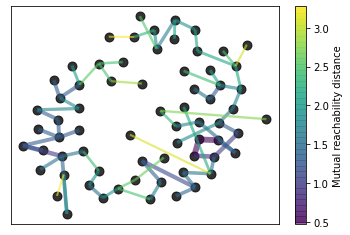

In [94]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

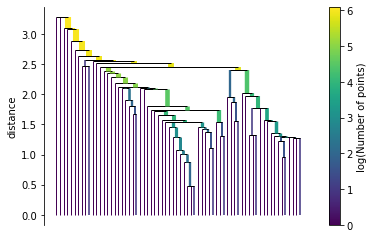

In [95]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

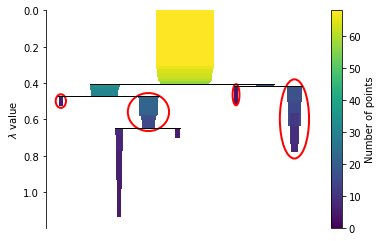

In [96]:
#clusterer.condensed_tree_.plot()
clusterer.condensed_tree_.plot(select_clusters=True)

In [97]:
from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

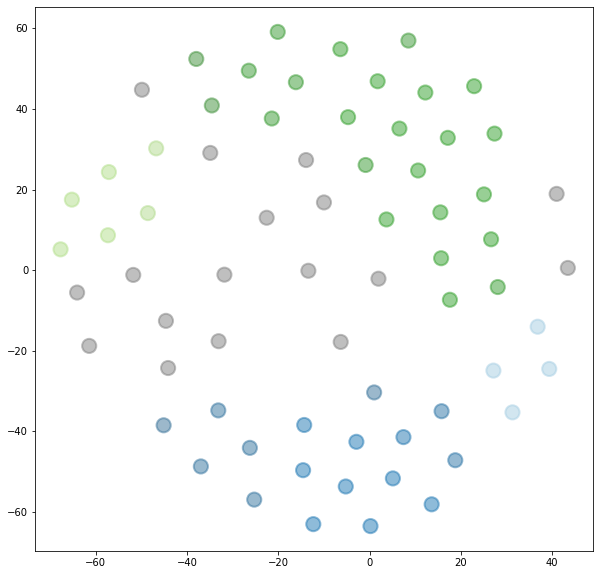

In [98]:
projection = TSNE().fit_transform(dat)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
else (0.5, 0.5, 0.5)
for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(*projection.T, s=200, linewidth=2, c=cluster_member_colors, alpha=0.5)

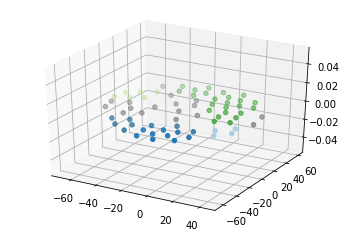

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*projection.T,c=cluster_member_colors)

In [100]:
len(countries)

68

In [101]:
len(probdata[0])

68

#### Comparison of country assignment probs

In [102]:
clus_argsort = np.lexsort((countries,clusdata[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata)):
    foo = probdata[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [ ]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
if len(set(clusdata_s))>10:
    print('currently only 10 colours allowed')
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

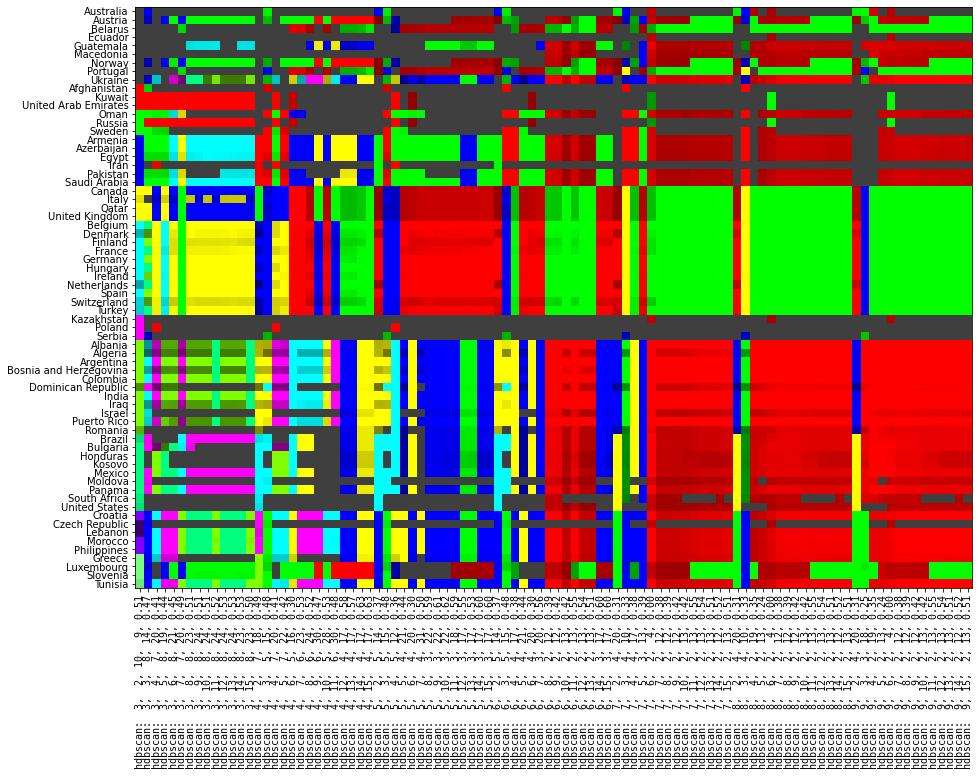

In [104]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


## PCA clusterings

In [105]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dbhscan
datasets = [c for c in clusdata_all]
print(datasets)
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

['deaths', 'cases', 'cases_lin2020', 'cases_pwlfit', 'cases_nonlin', 'cases_nonlinr']
doing  deaths ...
found 30 clusterings with size 3 clusters
doing  cases ...
found 16 clusterings with size 3 clusters
doing  cases_lin2020 ...
found 0 clusterings with size 3 clusters
Failed to find a cluster with 3 components
doing  cases_pwlfit ...
found 34 clusterings with size 3 clusters
doing  cases_nonlin ...
found 1 clusterings with size 3 clusters
doing  cases_nonlinr ...
found 1 clusterings with size 3 clusters


In [106]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata2 = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2 = np.zeros((len(res),len(countries)),dtype=np.integer)
probdata2s = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2s = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    probdata2[i,:] = foo.clus_probs[:]
    clusdata2[i,:] = foo.clus_labels[:]
    for j in range(len(scountries)):
        probdata2s[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata2s[i,j] = foo.clus_labels[clus_argsort[j]] 

In [107]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata2s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata2s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[1+cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array
report2 = ['umap_pca: %16s' % r for r in res]

In [108]:
report2

['umap_pca:           deaths',
 'umap_pca:            cases',
 'umap_pca:    cases_lin2020',
 'umap_pca:     cases_pwlfit',
 'umap_pca:     cases_nonlin',
 'umap_pca:    cases_nonlinr']

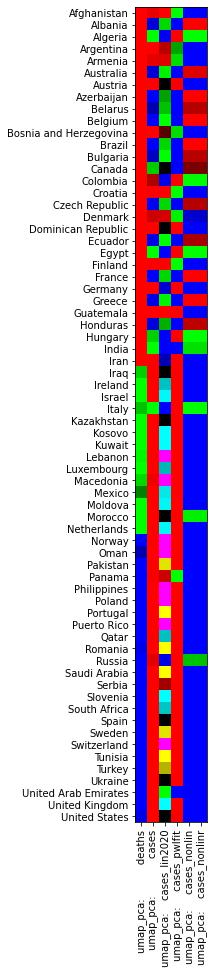

In [109]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(report2,rotation='vertical')
# fig.colorbar(img)
plt.show()

## HDBSCAN and PCA clusterings together

In [184]:
clusdata12 = np.concatenate((clusdata,clusdata2))
probdata12 = np.concatenate((probdata,probdata2))
report12 = report + report2
clus_argsort = np.lexsort((countries,clusdata12[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata12.copy()
clusdata_s = clusdata12.copy()
for i in range(len(probdata12)):
    foo = probdata12[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata12[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata12[i,clus_argsort[j]]   

In [185]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report12,rotation='vertical')
# fig.colorbar(img)
plt.show()

Mapping between clusters, so that recolor columns to best match 

In [219]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = set(clustering_a)
    labels_b = set(clustering_b)
    
    if len(labels_a) != len(colors_a): print('error wrong color list length for a')
    if len(labels_b) != len(colors_b): print('error wrong color list length for b')
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {a : colors_a[i] for i,a in enumerate(labels_a)}
    b_cols = {b : colors_b[i] for i,b in enumerate(labels_b)}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:maxlab})

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:maxlab})
    
    for b in labels_b:   # first adjust colors in b to match mapped clusters from a (transfer and merge)
        amap = [a for a in labels_a if a_to_b[a] == b]
        if len(amap) > 0:
            h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
            s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
            v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
            b_cols[b] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb

    for a in labels_a:   # now readjust colors in b that both map to same a (split)
        bmap = [b for b in labels_b if b_to_a[b] == a]
        if len(bmap)>1:
            h = sum([mpcolors.rgb_to_hsv(b_cols[b])[0] for b in bmap])/len(bmap) # average hue from bmap  
            ha = mpcolors.rgb_to_hsv(a_cols[a])[0]
            hb = np.linspace(abs(h-ha/4.),abs(h+ha/4.),len(bmap))
            #print('hb[',hb[0],hb[1],']',h,ha,ha/4.,abs(h-ha/4.),abs(h+ha/4.))
            for i,b in enumerate(bmap):
                s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                #print('s',s)
                v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                #print('v',v)
                b_cols[b]= mpcolors.hsv_to_rgb([hb[i],s,v])
                #print('hb[i],b_cols[b]',hb[i],b_cols[b])
    return b_cols,a_to_b,b_to_a

In [220]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,2,2,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1]])

({0: array([0., 1., 0.]), 1: array([1., 0., 0.]), 2: array([0., 0., 1.])},
 {0: 1, 1: 0, 2: 2},
 {0: 1, 1: 0, 2: 2})

In [221]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,3,3,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1],[1,1,0]])

({0: array([0., 1., 0.]),
  1: array([1., 0., 0.]),
  2: array([0., 1., 1.]),
  3: array([1., 0., 1.])},
 {0: 1, 1: 0, 2: 3},
 {0: 1, 1: 0, 2: 2, 3: 2})

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 

def match1(a,x):
    rtn = [1 if a[i] == x else 0 for i in range(len(a)) ]
    return rtn

## Family matching paper

References:
* [the paper](https://hal.inria.fr/hal-01514872/document)
* [the user manual](https://sbl.inria.fr/doc/D_family_matching-user-manual.html)
* [Structural Bioinformatics Library](https://sbl.inria.fr/doc/index.html) C++/python
* [jupyter notebook](https://sbl.inria.fr/demos/D_family_matching.ipynb)
